In [2]:
import pandas as pd
from ftplib import FTP
import os


#read in supplementary table
drugInfo = pd.read_csv("Drug_Info_Supp_Table.csv")
drugInfo["Drug"] = drugInfo["Drug"].str.strip()

#group all drugs by their type and turn into dictionary
drugTypes = drugInfo.groupby("Type")["Drug"].apply(list).to_dict()
#print(drugTypes)

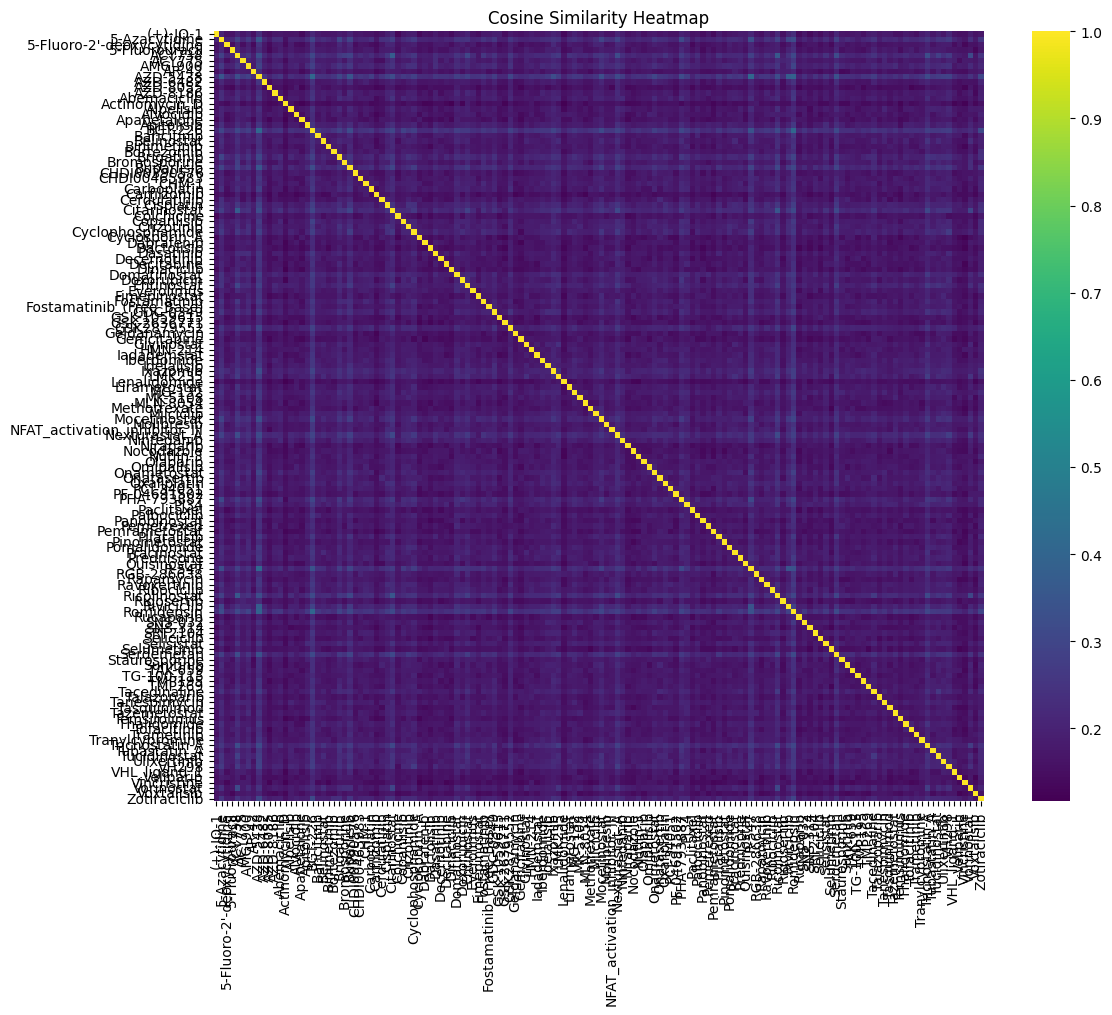

In [3]:
# create cosine similarity matrix for ic50
import numpy
import sklearn 
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# create a cosine similarity metric for just comparing 2 drugs
meanIntensityMatrix = pd.read_csv("ic50_matrix.csv", index_col = 0).fillna(0)
# transpose data so drugs become rows instead of columns
transposedData = meanIntensityMatrix.transpose()
# save drug names index column for after
drugNames = transposedData.index

# plug those into the cosine_similarity function
cosineSimilarityMatrix = cosine_similarity(transposedData)
# convert to a dataframe, make row/column labels be the drug names
cosineSimilarityMatrix = pd.DataFrame(cosineSimilarityMatrix, columns = drugNames, index = drugNames)
cosineSimilarityMatrix.to_csv("Cosine_Similarity_Matrix_ic50.csv")

plt.figure(figsize=(12, 10))
sns.heatmap(cosineSimilarityMatrix, cmap="viridis", square=True, xticklabels=True, yticklabels=True)
plt.title("Cosine Similarity Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
